# Movie Recommendation Project
## Trinity Prichard Code Louisville 2022


This project allows the user to get movie recommendations from a dataset, established from 2006-2016.

The website for the zip file used in this project is available following this link. https://grouplens.org/datasets/movielens/25m/ 

In [1]:
import pandas as pd 

In [2]:
import re

In [3]:
import numpy as np

In [4]:
import matplotlib

In [5]:
import matplotlib.pyplot as plt

## Importing Zip File

In [6]:
import zipfile

In [7]:
with zipfile.ZipFile('ml-25m.zip', 'r') as zip_ref:
    zip_ref.extractall()

## Importing Pandas, gathering data from dataset movies.csv

In [8]:
movies = pd.read_csv('ml-25m/movies.csv')

In [9]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


## Clearing movie titles with using Regex Import

In [10]:
def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

In [11]:
movies["clean_title"] = movies["title"].apply(clean_title)

In [12]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62418,209157,We (2018),Drama,We 2018
62419,209159,Window of the Soul (2001),Documentary,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),A Girl Thing 2001


## Creating a tfidf matrix, and using it to make a search function within the application

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(movies["clean_title"])

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def search(title):
    
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
##find the titles with the closest similarity with search word "find 5 most similar titles"
    indices = np.argpartition(similarity, -5) [-5:]
##getting the titles we care about, making closest result towards the top of chart
    results = movies.iloc[indices][::-1]
    return results

## Creating an Interactive Search Space

In [15]:
import ipywidgets as widgets
from IPython.display import display 

movie_input = widgets.Text(
    value = "Toy Story",
    description ="Movie Title:",
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title)>5:
            display(search(title))
        

movie_input.observe(on_type, names ='value')

display(movie_input, movie_list)

Text(value='Toy Story', description='Movie Title:')

Output()

## Applying Ratings.CSV to create recommendations

In [16]:
ratings = pd.read_csv('ml-25m/ratings.csv')

In [17]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


## Searching for users who share the same interests in movies

In [18]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [19]:
movie_id = 1

In [20]:

similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] >4)]["userId"].unique()

In [21]:
similar_users

array([    36,     75,     86, ..., 162527, 162530, 162533], dtype=int64)

In [22]:
similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"]>4)]["movieId"]

In [23]:
similar_user_recs

5101            1
5105           34
5111          110
5114          150
5127          260
            ...  
24998854    60069
24998861    67997
24998876    78499
24998884    81591
24998888    88129
Name: movieId, Length: 1358326, dtype: int64

In [24]:
similar_user_recs =similar_user_recs.value_counts() / len(similar_users)
##Users that are only greater that 10%
similar_user_recs = similar_user_recs[similar_user_recs >.1]

In [25]:
similar_user_recs

1        1.000000
318      0.445607
260      0.403770
356      0.370215
296      0.367295
           ...   
953      0.103053
551      0.101195
1222     0.100876
745      0.100345
48780    0.100186
Name: movieId, Length: 113, dtype: float64

## Finding the popularity of movies based on all users.

In [26]:
all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] >4)]

In [27]:
all_users

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
29,1,4973,4.5,1147869080
48,1,7361,5.0,1147880055
72,2,110,5.0,1141416589
76,2,260,5.0,1141417172
...,...,...,...,...
25000062,162541,5618,4.5,1240953299
25000065,162541,5952,5.0,1240952617
25000078,162541,7153,5.0,1240952613
25000081,162541,7361,4.5,1240953484


In [28]:

all_users_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

In [29]:
all_users_recs

318      0.342220
296      0.284674
2571     0.244033
356      0.235266
593      0.225909
           ...   
551      0.040918
50872    0.039111
745      0.037031
78499    0.035131
2355     0.025091
Name: movieId, Length: 113, dtype: float64

## Creating a Recommendation Score based on Similar_Users and All_Users

In [30]:
rec_percentages = pd.concat([similar_user_recs, all_users_recs], axis =1)
rec_percentages.columns = ["similar", "all"]

In [31]:
rec_percentages

,similar,all
1,1.000000,0.124728
318,0.445607,0.342220
260,0.403770,0.222207
356,0.370215,0.235266
296,0.367295,0.284674
...,...,...
953,0.103053,0.045792
551,0.101195,0.040918
1222,0.100876,0.066877
745,0.100345,0.037031


In [32]:
##creating a recommendation score
rec_percentages["score"] = rec_percentages["similar"]/rec_percentages["all"]

In [33]:
rec_percentages = rec_percentages.sort_values("score", ascending = False)

In [34]:
rec_percentages

,similar,all,score
1,1.000000,0.124728,8.017414
3114,0.280648,0.053706,5.225654
2355,0.110539,0.025091,4.405452
78499,0.152960,0.035131,4.354038
4886,0.235147,0.070811,3.320783
...,...,...,...
2858,0.216724,0.167634,1.292845
296,0.367295,0.284674,1.290232
79132,0.166817,0.131384,1.269693
4973,0.142501,0.112405,1.267747


In [35]:
rec_percentages.head(10).merge(movies, left_index = True, right_on="movieId")

,similar,all,score,movieId,title,genres,clean_title
0,1.000000,0.124728,8.017414,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
3021,0.280648,0.053706,5.225654,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
2264,0.110539,0.025091,4.405452,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,Bugs Life A 1998
14813,0.152960,0.035131,4.354038,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,Toy Story 3 2010
4780,0.235147,0.070811,3.320783,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,Monsters Inc 2001
580,0.216618,0.067513,3.208539,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,Aladdin 1992
6258,0.228139,0.072268,3.156862,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,Finding Nemo 2003
587,0.179400,0.059977,2.991150,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Beauty and the Beast 1991
8246,0.203504,0.068453,2.972889,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,Incredibles The 2004
359,0.253411,0.085764,2.954762,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Lion King The 1994


## Building the recommendation functionality

In [36]:
def find_similar_movies(movie_id):
    ##finding recommendations for users similar to us
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    ##adjusting recommendations for over 10% of users recommending that movie
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    ##finding how common the recommendations were among all users
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    ##determing recommendation score
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    ##generating recommendation score
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    ##sorting recommendation score
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    ##returing score
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

## Recommendation Widget

In [37]:
import ipywidgets as widgets
from IPython.display import display
movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names="value")

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()

## In case the recommendation Widget decides not to work properly


In [38]:
title = input("Enter a title: ")
search(title)

Enter a title: Toy Story


,movieId,title,genres,clean_title
3021,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
14813,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,Toy Story 3 2010
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
59767,201588,Toy Story 4 (2019),Adventure|Animation|Children|Comedy,Toy Story 4 2019
20497,106022,Toy Story of Terror (2013),Animation|Children|Comedy,Toy Story of Terror 2013


## A bubble chart to prove I can do it

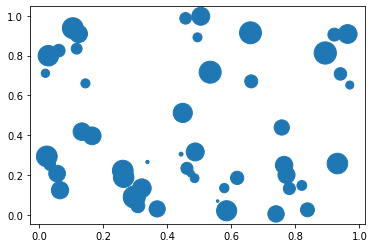

In [39]:
x = np.random.rand(50)
y = np.random.rand(50)
sizes = np.random.rand(50)
plt.scatter(x,y,s = sizes*500)
plt.show()

## Histogram

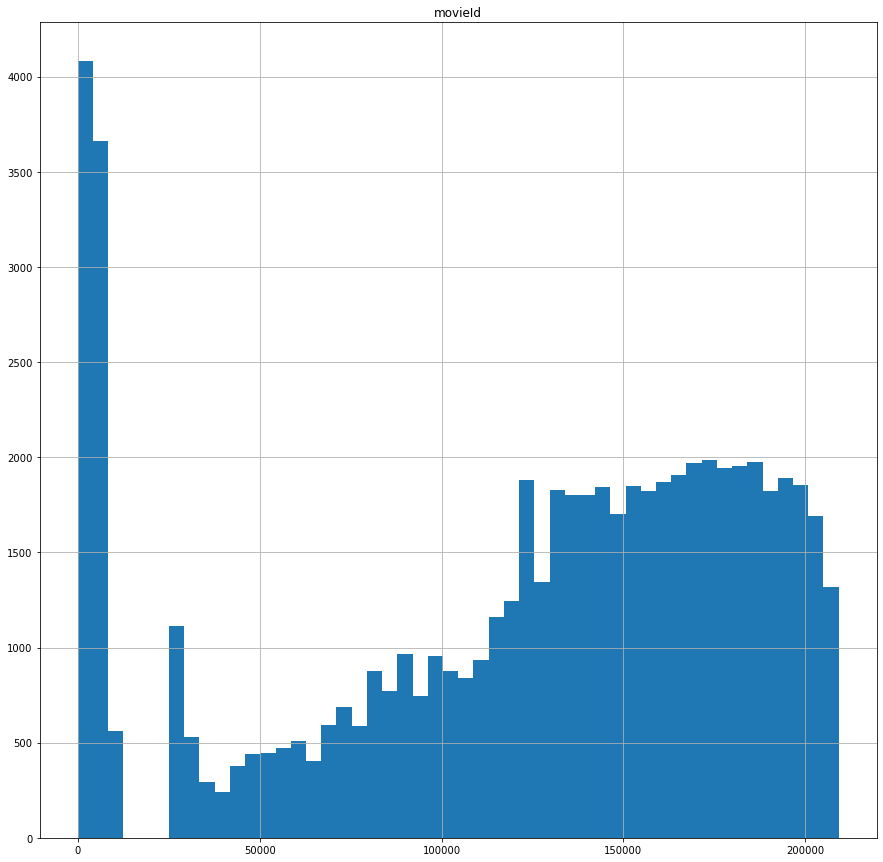

In [51]:
movies.hist(bins = 50, figsize = (15,15))
plt.show()